In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F #package allows us to use relu activation
import matplotlib.pyplot as plt #Plotting
import sklearn.datasets # Example datasets

In [22]:
#creates a dummy data points ((x,y) coordinates) with 200 samples and some noise
x, y = sklearn.datasets.make_moons(200, noise=0.20)

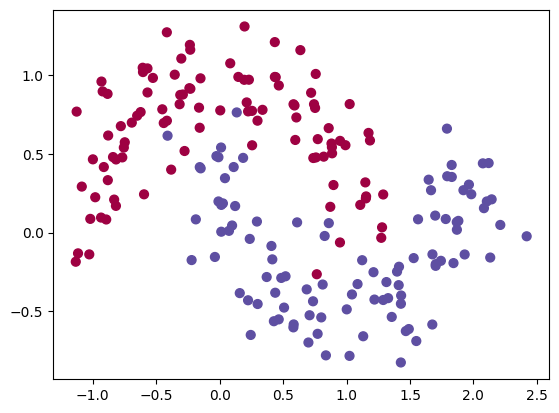

In [23]:
#color map shows which colors should be mapped to which classes.
plt.scatter(x[:,0],x[:,1], s = 40, c = y, cmap = plt.cm.Spectral)

In [24]:
# As we can see in the graph above that this data set is not linearly separable. This is wher the NN's nonlinearity becomes evident

#Convert datasets to torch tensors. The labels would be long (int64) in this example. 
x = torch.FloatTensor(x)
y = torch.LongTensor(y)


In [25]:
#Linear layer is part of nn.Module
#NN arch 3 layers. input layer, hidden layer and output layer
class FeedForward(nn.Module):
    def __init__(self, input_neurons, hidden_neurons, output_neurons) -> None:
        super(FeedForward, self).__init__()
        self.hidden = nn.Linear(input_neurons, hidden_neurons)
        self.output = nn.Linear(hidden_neurons, output_neurons)

    #Overriding the function from nn.Module
    def forward(self, x) -> torch.FloatTensor:
        out = self.hidden(x)
        out = F.relu(out)
        out = self.output(out)
        return out

In [26]:
#object of class, loss and optimizer
net = FeedForward(2,50,2)

#Since we have used 2 neurons, we cant use BCE loss. We need to use cross entropy and in pytorch it comes with the softmax function.
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(net.parameters(), lr=0.02)

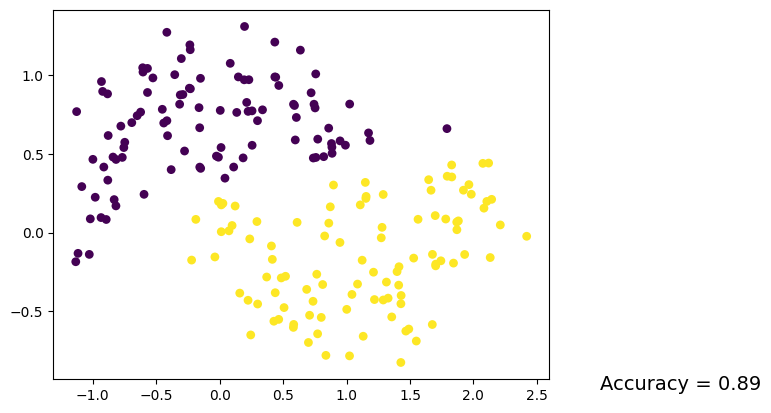

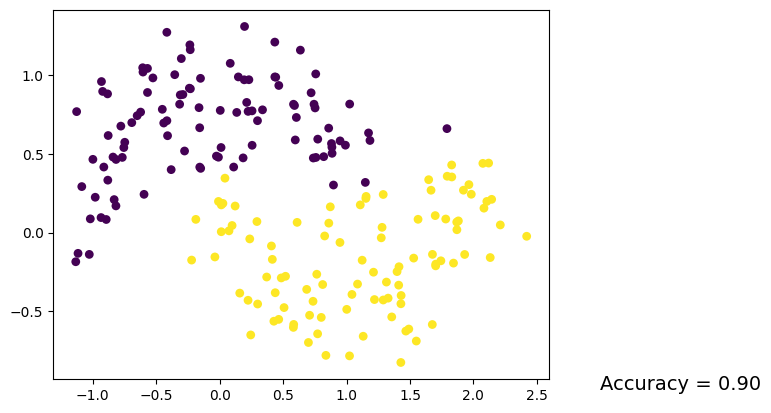

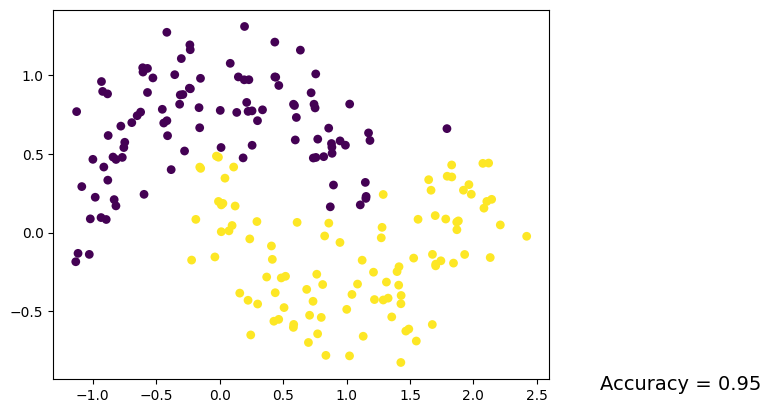

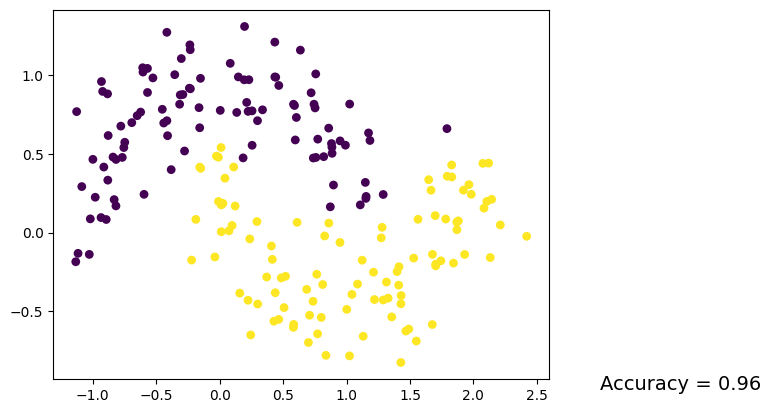

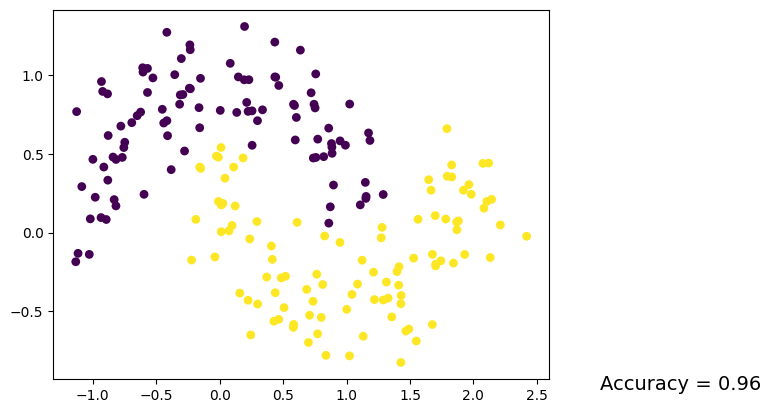

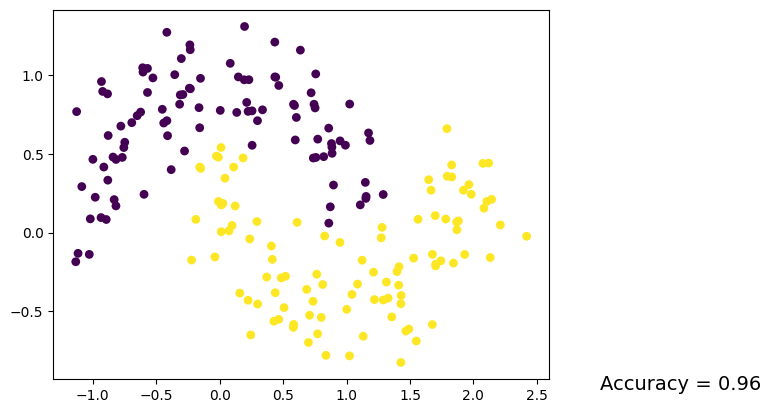

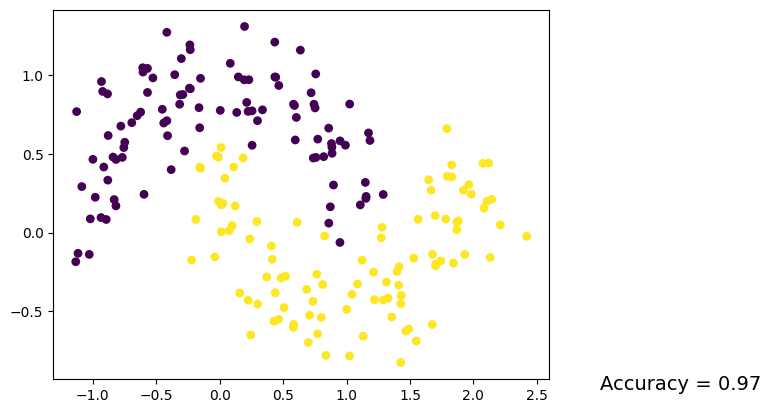

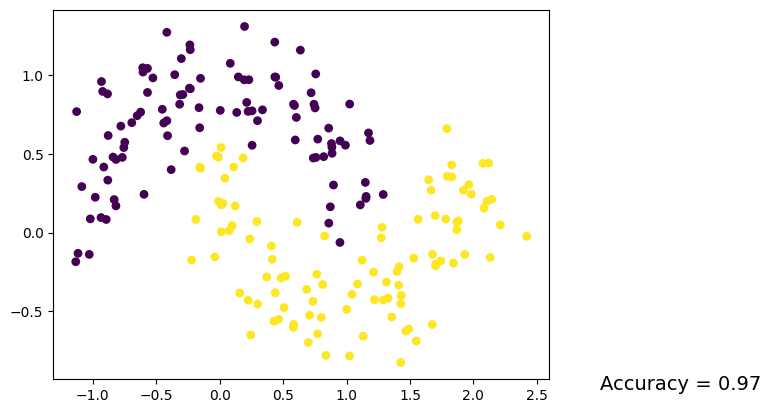

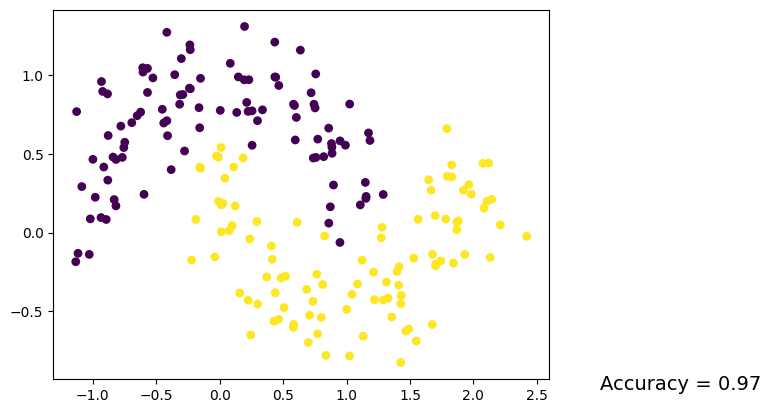

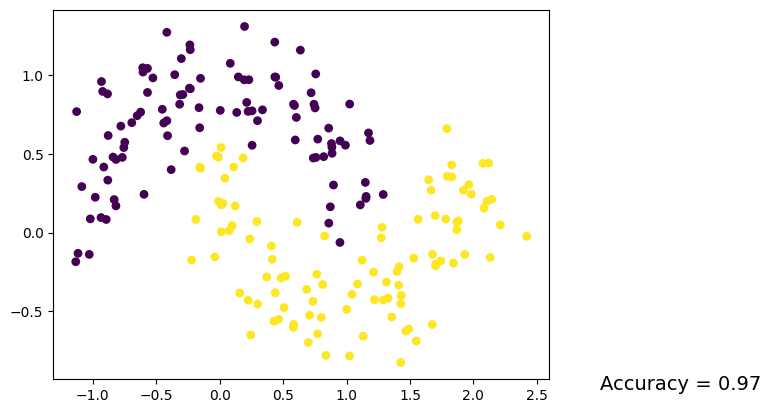

In [28]:
#Train
plt.ion()
for epoch in range(10000):
    #Pytorch automatically calls the forward method
    out = net(x)
    loss = loss_fn(out, y)
    
    #Clear out the gradient accumulator, update gradients and update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #Each 1k epochs check how the learning is progressing
    if epoch % 1000 == 0:
        max_value, prediction = torch.max(out, 1) #Max across the columns gives the prediciton of model for the input

        #Matplot lib expects a numpy array and we can't use torch tensors
        predicted_y = prediction.data.numpy()
        #Actual labels we generated
        target_y = y.data.numpy()
        features = x.data.numpy()

        plt.scatter(features[:,0], features[:,1], s = 40, c = predicted_y, lw = 0)

        accuracy = (prediction==y).float().mean().data.numpy()
        plt.text(3,-1, f"Accuracy = {accuracy:.2f}", fontdict = {'size': 14})
        plt.pause(0.1)

plt.ioff()
plt.show()
